In [ ]:
'''
Cart-pole solution with DQN
'''

In [ ]:
# Import libraries
import numpy as np
import torch 
import torch.nn as nn
import torch.optim as optim
import gym
import copy

In [ ]:
env = gym.make("CartPole-v1")

In [ ]:
n_actions = env.action_space.n
input_dim = env.observation_space.shape[0]

model =nn.Sequential(nn.Linear(input_dim,32),
                     nn.ReLU(),
                     nn.Linear(32,16),
                     nn.ReLU(),
                     nn.Linear(16,n_actions))

model_target = copy.deepcopy(model)
loss_fn = nn.MSELoss()
Learning_rate = 1e-3
optimizer = optim.Adam(model.parameters(),lr= Learning_rate)

In [ ]:
def learning(replay_memory,traget_update,minibatch_size=32):

    minibatch = np.random.choice(replay_memory, minibatch_size ,replace=True)
    s = np.array(list(map(lambda x:x['s'], minibatch)))
    a = np.array(list(map(lambda x:x['a'], minibatch)))
    r = np.array(list(map(lambda x:x['r'], minibatch)))
    sprime = np.array(list(map(lambda x:x['sprime'], minibatch)))
    done = np.array(list(map(lambda x:x['done'], minibatch)))

    global model_target

    if traget_update: 
      model_target = copy.deepcopy(model)
    q_s = model(torch.tensor(s).float())
    q_sprime = model_target(torch.tensor(sprime).float())
    q_s_target = q_s.detach().clone()
    
    for i,(s1, a1, r1, q_sprime1, done1) in enumerate(zip(s, a, r, q_sprime, done)):
        if not done1: 
          target = r1 + gamma * torch.max(q_sprime1)
        else:
          target = r1
        q_s_target[i][a1] = target
    
    optimizer.zero_grad()
    loss = loss_fn(q_s ,q_s_target)
    loss.backward()
    optimizer.step()

In [ ]:
n_episodes = 1000
gamma = 0.98
epsilon = 0.9
minibatch_size = 32
r_sums = []
replay_memory = []
mem_max_size = 120000

for n in range(n_episodes):
    s, done, r_sum, flag = env.reset(), False, 0, 1
    while not done:
        q_s = model(torch.tensor(s).float())        
        if np.random.random() < epsilon:
            a = env.action_space.sample()
        else:
            a = np.argmax(q_s.detach().numpy())    
        sprime,r,done,info = env.step(a)
        r_sum += r
        if len(replay_memory) > mem_max_size:
            replay_memory.pop(0)
        replay_memory.append({"s":s, "a":a, "r":r, "sprime":sprime, "done":done})
        s = sprime
        if n %1 == 0 and flag == 1:
            flag, traget_update = 0, True 
        else:
            traget_update = False
        learning(replay_memory, traget_update, minibatch_size=minibatch_size)
    if epsilon > 0.1:
        epsilon -= 0.001
    r_sums.append(r_sum)
    if n % 10 == 0:
        print(f'Episode {n}: {r_sum}') 
        
              

Episode 0: 37.0
Episode 10: 18.0
Episode 20: 11.0
Episode 30: 19.0
Episode 40: 21.0
Episode 50: 15.0
Episode 60: 29.0
Episode 70: 36.0
Episode 80: 15.0
Episode 90: 14.0
Episode 100: 60.0
Episode 110: 16.0
Episode 120: 11.0
Episode 130: 17.0
Episode 140: 13.0
Episode 150: 55.0
Episode 160: 21.0
Episode 170: 13.0
Episode 180: 27.0
Episode 190: 21.0
Episode 200: 22.0
Episode 210: 95.0
Episode 220: 14.0
Episode 230: 39.0
Episode 240: 18.0
Episode 250: 16.0
Episode 260: 37.0
Episode 270: 22.0
Episode 280: 35.0
Episode 290: 24.0
Episode 300: 23.0
Episode 310: 19.0
Episode 320: 23.0
Episode 330: 48.0
Episode 340: 21.0
Episode 350: 32.0
Episode 360: 18.0
Episode 370: 34.0
Episode 380: 21.0
Episode 390: 14.0
Episode 400: 13.0
Episode 410: 14.0
Episode 420: 13.0
Episode 430: 20.0
Episode 440: 16.0
Episode 450: 13.0
Episode 460: 15.0
Episode 470: 64.0
Episode 480: 132.0
Episode 490: 9.0
Episode 500: 89.0
Episode 510: 50.0
Episode 520: 34.0
Episode 530: 16.0
Episode 540: 75.0
Episode 550: 64.0
Epi

Text(0, 0.5, 'Reward')

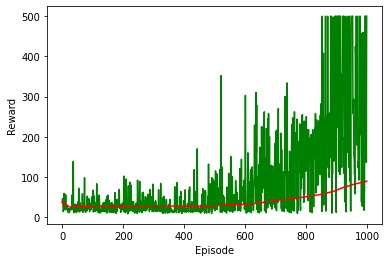

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt
mavg = []
t, j = r_sums[0], 2
for i in r_sums:
    t+=i
    mavg.append(t/j)
    j+=1
plt.plot(r_sums,color="g")
plt.plot(mavg,color="r")
plt.xlabel("Episode")
plt.ylabel("Reward")